In [43]:
import pandas as pd
import numpy as np
import re
import nltk
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **1. Data Splitting**

In [44]:
from sklearn.model_selection import train_test_split

ulasanSumbersira = pd.read_csv('/content/drive/MyDrive/portofolio_data_analyst/hasil_sentiment.csv')

# Memastikan tidak ada baris kolom yang kosong
ulasanSumbersira = ulasanSumbersira.dropna(subset=['ulasan_normalisasi', 'Sentiment'])

# Ambil teks dan label dari dataframe
X = ulasanSumbersira['ulasan_normalisasi']
y = ulasanSumbersira['Sentiment']

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42, # Agar data selalu sama setiap dijalankan
    stratify=y # Agar distribusi label seimbang
)

# Cek jumlah data hasil split
print("Jumlah data latih:", len(X_train))
print("Jumlah data uji:", len(X_test))

Jumlah data latih: 1078
Jumlah data uji: 270


# **2. Pembobotan Kata TF-IDF**

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
# Hanya fit dan transform pada data latih
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform pada data uji (jangan fit ulang)
X_test_tfidf = vectorizer.transform(X_test)

In [46]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)

In [47]:
from imblearn.over_sampling import SMOTE

# Menerapkan SMOTE untuk menyeimbangkan data minoritas
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

# Label Encoder
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train_resampled)
y_test_enc = le.transform(y_test)

In [48]:
feature_names = vectorizer.get_feature_names_out()

# Konversi hasil TF-IDF Data Latih ke DataFrame agar mudah dibaca
tfidf_X_train = pd.DataFrame(X_train_tfidf.toarray(), columns=feature_names)

tfidf_X_train

,abis,acara,ada,adalah,adanya,aer,aestetic,agak,agar,air,...,worth,wow,wudhu,yaitu,yakni,yang,yes,you,youtube,zonk
0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.153099,...,0.0,0.000000,0.0,0.0,0.0,0.132314,0.0,0.0,0.0,0.0
1,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.191709,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.00000,0.0,0.251874,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1074,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1075,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1076,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [49]:
# Konversi hasil TF-IDF Data Uji ke DataFrame agar mudah dibaca
tfidf_X_test = pd.DataFrame(X_test_tfidf.toarray(), columns=feature_names)

tfidf_X_test

,abis,acara,ada,adalah,adanya,aer,aestetic,agak,agar,air,...,worth,wow,wudhu,yaitu,yakni,yang,yes,you,youtube,zonk
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.229340,0.0,0.0,0.0,0.0,0.0,0.0,0.104202,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.211335,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.0,0.0,0.125774,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
266,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
267,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
268,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


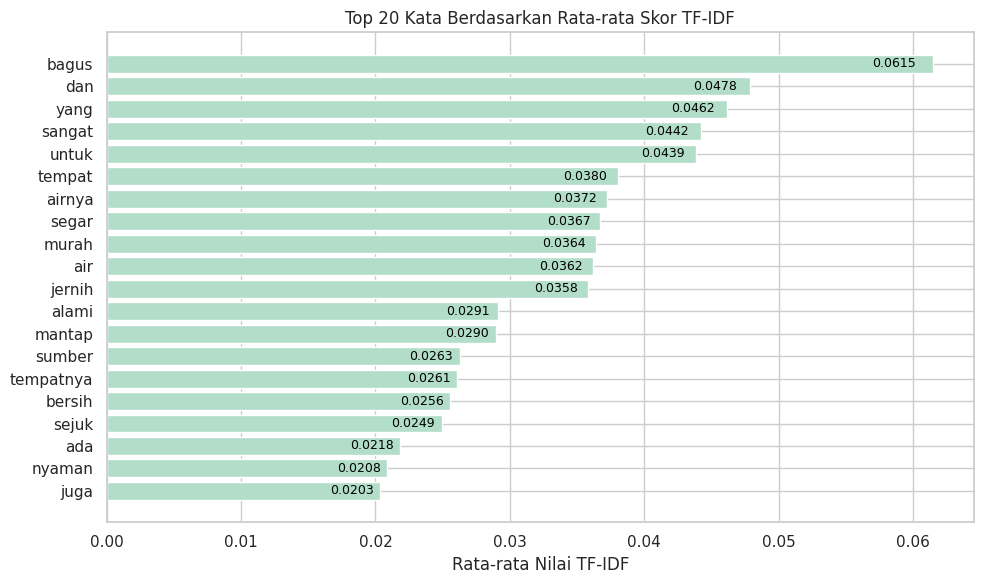

In [50]:
import matplotlib.pyplot as plt
import numpy as np

average_tfidf = X_train_tfidf.mean(axis=0).A1

# Gabungkan kata dan skor, lalu urutkan
tfidf_scores = list(zip(feature_names, average_tfidf))
sorted_scores = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)

# Ambil top-N kata
top_n = 20
top_words = sorted_scores[:top_n]
words, scores = zip(*top_words)

# Visualisasi
plt.figure(figsize=(10,6))
bars = plt.barh(words[::-1], scores[::-1], color='#B1DDC9')
plt.xlabel("Rata-rata Nilai TF-IDF")
plt.title(f"Top {top_n} Kata Berdasarkan Rata-rata Skor TF-IDF")

# Tambahkan label di dalam bar
for bar, score in zip(bars, scores[::-1]):
    plt.text(bar.get_width() * 0.98,
             bar.get_y() + bar.get_height() / 2,
             f"{score:.4f}",
             ha='right', va='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()

# **3. SUPPORT VECTOR MACHINE - TF IDF**

In [51]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Membuat model SVM dengan class_weight
svm_balanced = LinearSVC(class_weight='balanced', random_state=42)

# Latih model (Data Latih)
svm_balanced.fit(X_train_resampled, y_train_resampled)

# Prediksi (Data Uji)
y_pred_balanced = svm_balanced.predict(X_test_tfidf)

# Evaluasi (Prediksi)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_balanced))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_balanced))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_balanced))

Confusion Matrix:
[[  8   0  11]
 [  2  28  15]
 [  6  16 184]]

Classification Report:
              precision    recall  f1-score   support

     negatif       0.50      0.42      0.46        19
      netral       0.64      0.62      0.63        45
     positif       0.88      0.89      0.88       206

    accuracy                           0.81       270
   macro avg       0.67      0.65      0.66       270
weighted avg       0.81      0.81      0.81       270


Accuracy Score:
0.8148148148148148


In [52]:
!pip install seaborn matplotlib

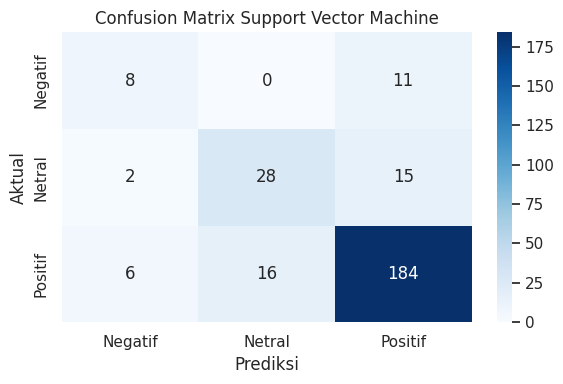

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# y_test (aktual) dan y_pred_balanced (prediksi)
cm = confusion_matrix(y_test, y_pred_balanced)
labels = ['Negatif', 'Netral', 'Positif']

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.title('Confusion Matrix Support Vector Machine')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.tight_layout()
plt.show()

# **4. K-NEAREST NEIGHBOR - TF IDF**

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Membuat model KNN dengan jumlah tetangga (k) = 5
model_knn = KNeighborsClassifier(n_neighbors=5)

# Latih model (Data Latih)
model_knn.fit(X_train_resampled, y_train_resampled)

# Prediksi (Data Uji)
y_pred_knn = model_knn.predict(X_test_tfidf)

# Evaluasi (Prediksi)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_knn))

Confusion Matrix:
[[15  2  2]
 [ 6 34  5]
 [33 88 85]]

Classification Report:
              precision    recall  f1-score   support

     negatif       0.28      0.79      0.41        19
      netral       0.27      0.76      0.40        45
     positif       0.92      0.41      0.57       206

    accuracy                           0.50       270
   macro avg       0.49      0.65      0.46       270
weighted avg       0.77      0.50      0.53       270


Accuracy Score:
0.4962962962962963


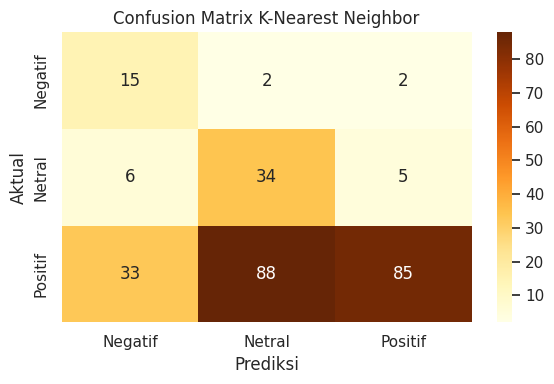

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# y_test (aktual) dan y_pred_balanced (prediksi)
cm = confusion_matrix(y_test, y_pred_knn)
labels = ['Negatif', 'Netral', 'Positif']

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrBr',
            xticklabels=labels, yticklabels=labels)

plt.title('Confusion Matrix K-Nearest Neighbor')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.tight_layout()
plt.show()

# **5. NAIVE BAYES CLASSIFIER - TF IDF**

In [56]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Membuat model NBC dengan MultinomialNB
model_nb = MultinomialNB()

# Latih model (Data Latih SMOTE)
model_nb.fit(X_train_tfidf, y_train)

# Prediksi (Data Uji)
y_pred_nb = model_nb.predict(X_test_tfidf)

# Evaluasi (Prediksi)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_nb))

Confusion Matrix:
[[  0   0  19]
 [  0   1  44]
 [  0   0 206]]

Classification Report:
              precision    recall  f1-score   support

     negatif       0.00      0.00      0.00        19
      netral       1.00      0.02      0.04        45
     positif       0.77      1.00      0.87       206

    accuracy                           0.77       270
   macro avg       0.59      0.34      0.30       270
weighted avg       0.75      0.77      0.67       270


Accuracy Score:
0.7666666666666667


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


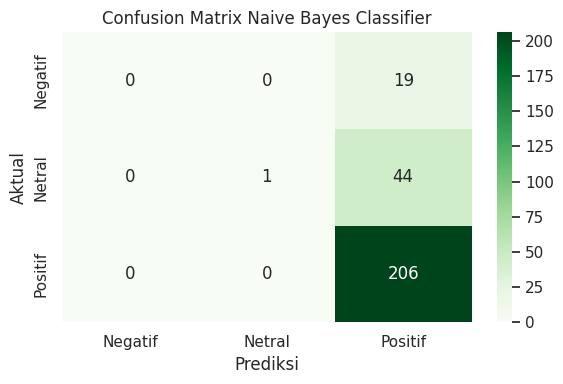

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# y_test (aktual) dan y_pred_balanced (prediksi)
cm = confusion_matrix(y_test, y_pred_nb)
labels = ['Negatif', 'Netral', 'Positif']

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=labels, yticklabels=labels)

plt.title('Confusion Matrix Naive Bayes Classifier')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.tight_layout()
plt.show()

# **6. Pembobotan Kata FAST TEXT**

In [58]:
# Simpan data ke file txt dengan format FastText
def save_fasttext_format(X, y, filename): # X (ulasan), y (label), filename (nama file output.txt)
    with open(filename, 'w', encoding='utf-8') as f:
        for text, label in zip(X, y):
            line = f"__label__{label} {text}\n"
            f.write(line)

save_fasttext_format(X_train, y_train, 'train.txt')
save_fasttext_format(X_test, y_test, 'test.txt')

In [59]:
!pip install fasttext
import fasttext

In [60]:
# === FEATURE EXTRACTION MENGGUNAKAN FASTTEXT EMBEDDING ===
# Ubah teks menjadi vektor embedding dari model fasttext
from sklearn.preprocessing import LabelEncoder

model = fasttext.train_supervised('train.txt', epoch=25, lr=1.0, wordNgrams=2, verbose=2)

def get_embedding(texts, model):
    embeddings = []
    for text in texts:
        embeddings.append(model.get_sentence_vector(text))
    return np.array(embeddings)

X_train_emb = get_embedding(X_train, model)
X_test_emb = get_embedding(X_test, model)

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

In [61]:
model.get_sentence_vector('air')

array([-0.20012236,  0.11257076, -0.073516  ,  0.04577392, -0.15447383,
        0.07139002,  0.12268816,  0.1510991 ,  0.01082317,  0.00078431,
        0.03664883, -0.01907692,  0.1608189 ,  0.05900497, -0.01799078,
        0.04705765,  0.04235134,  0.08146831,  0.07609187, -0.11600105,
       -0.09931704,  0.02339374, -0.06754111,  0.09756064,  0.00135826,
       -0.05556957, -0.00383016,  0.05045084,  0.00889242,  0.03550408,
       -0.03492477,  0.0623419 , -0.07714339, -0.01989736, -0.04422629,
       -0.03160451,  0.02473723, -0.05150295, -0.0236089 , -0.07680801,
        0.20200425,  0.02059852,  0.03155446, -0.00923862, -0.10032945,
        0.06084442, -0.08742997, -0.01776484, -0.03000088,  0.0350054 ,
       -0.061279  ,  0.06384739, -0.01103515,  0.06217669,  0.05955298,
        0.08791336,  0.00632466, -0.03409901,  0.03598817,  0.0365868 ,
       -0.13937476, -0.03148967,  0.01290175, -0.01538996, -0.0286295 ,
       -0.07511818, -0.02598569,  0.09992422,  0.12692593, -0.01

In [62]:
model.get_nearest_neighbors('sumber')

[(0.9987994432449341, 'memuaskan'),
 (0.9987638592720032, 'inovasi'),
 (0.9983623027801514, 'alam'),
 (0.9977821707725525, 'renang'),
 (0.9973287582397461, 'tambah'),
 (0.9968964457511902, 'datang'),
 (0.9967459440231323, 'disana'),
 (0.9952636957168579, 'lagi'),
 (0.9947878122329712, 'begitu'),
 (0.9942073822021484, 'anak')]

In [63]:
import pandas as pd

labels_with_prefix = ['__label__' + str(label) for label in y_train]
df_emb = pd.DataFrame(X_train_emb)
df_emb.insert(0, 'label', labels_with_prefix)
df_emb['teks'] = X_train.values

In [64]:
df_emb

,label,0,1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,98,99,teks
0,__label__positif,0.048480,0.034582,0.007313,-0.031453,0.113390,0.016940,-0.018511,-0.063264,0.063183,...,-0.047755,0.055929,-0.063196,-0.040733,-0.081407,-0.035556,-0.018110,-0.043681,-0.009455,reservasi dan perbaikan kurang tong sampah yan...
1,__label__netral,-0.133773,-0.009028,-0.035915,0.057340,-0.205538,0.005522,0.065861,0.135457,-0.084184,...,0.126655,-0.044251,0.070620,0.068762,0.114829,0.084608,0.070064,0.065803,0.009132,berapa harga tiket masuknya
2,__label__positif,0.026438,0.053984,-0.002282,-0.027877,0.101475,0.027342,-0.002580,-0.047704,0.071948,...,-0.026642,0.072214,-0.074759,-0.041646,-0.085445,-0.023314,0.000518,-0.044237,-0.011967,mantap banyak wahana dan tempatnya juga sangat...
3,__label__positif,0.018173,0.073107,-0.007367,-0.030971,0.112417,0.039498,0.006743,-0.046378,0.088007,...,-0.021938,0.092902,-0.094159,-0.047148,-0.104366,-0.021015,0.009520,-0.053698,-0.017138,tempatnya sejuk karena sumber mata air bisa un...
4,__label__positif,0.021197,0.030837,0.001178,-0.019114,0.067027,0.016565,-0.004048,-0.033278,0.046092,...,-0.021143,0.044254,-0.047132,-0.026643,-0.055099,-0.017215,-0.002347,-0.028047,-0.007932,lebih seringnya kesini cuma untuk ngopi tidak ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,__label__positif,0.025117,0.056294,-0.000778,-0.029073,0.099855,0.028599,-0.000696,-0.044457,0.074762,...,-0.027073,0.075011,-0.076198,-0.041125,-0.088233,-0.022431,0.002662,-0.045742,-0.012189,tempat bagus lumayan wisata didesa cocok area ...
1074,__label__positif,0.057275,0.045668,0.010362,-0.039220,0.136316,0.022619,-0.016772,-0.075831,0.078472,...,-0.057170,0.070375,-0.079622,-0.052186,-0.101859,-0.042279,-0.019290,-0.055200,-0.015079,bagus kalau foto
1075,__label__netral,-0.107852,0.045007,-0.039616,0.032850,-0.104465,0.033078,0.064754,0.088207,-0.013338,...,0.101589,0.027780,-0.004619,0.027688,0.027534,0.061342,0.073059,0.020684,-0.005181,view mantap untuk kita terutama keluarga
1076,__label__positif,0.176697,0.192588,0.017572,-0.138149,0.483985,0.093042,-0.049427,-0.248248,0.306183,...,-0.176725,0.281630,-0.304527,-0.185220,-0.374612,-0.131493,-0.043423,-0.197037,-0.049324,seru murah dan segar airnya jernih


In [65]:
print(X_test.iloc[0])  # teks asli
print(X_test_emb[0])   # vektor hasil FastText

tempatnya sejuk menyegarkan
[-0.11513589  0.08908848 -0.04631341  0.02336275 -0.06644312  0.05619683
  0.0772677   0.08177833  0.0334106   0.02193185  0.02066521  0.00854019
  0.09420677  0.04301145 -0.02460269  0.02721849  0.02237365  0.04061195
  0.05145381 -0.08028386 -0.04163396  0.0313844  -0.02806459  0.04059182
  0.00757795 -0.04644712  0.01556947  0.02505856 -0.00844604  0.04680242
 -0.02403047  0.03041481 -0.05924435 -0.01652738 -0.05360668 -0.01697832
  0.02042326 -0.03510627 -0.00262815 -0.05081346  0.12552723  0.03138077
  0.0262027   0.0113272  -0.0532383   0.03280731 -0.04434909 -0.01106418
 -0.03334839  0.03037533 -0.05785025  0.04429025 -0.02844238  0.0436916
  0.03666692  0.04061787  0.00018869 -0.01183791  0.04124691  0.03409068
 -0.0907672  -0.00471805  0.02897548  0.00383111 -0.03145575 -0.03346363
 -0.04121201  0.07209819  0.07175737  0.0044369   0.0141148  -0.05908472
 -0.07274921  0.01351085  0.00861948 -0.06577847  0.00606376  0.04298466
 -0.00335687 -0.02978423

In [66]:
print(X_train.iloc[0])  # teks asli
print(X_train_emb[0])   # vektor hasil FastText

reservasi dan perbaikan kurang tong sampah yang minimal kalau soal air bening sangat
[ 0.04848     0.03458207  0.00731279 -0.03145343  0.11339036  0.01694039
 -0.01851077 -0.06326375  0.0631832   0.06290971 -0.01667486  0.0422131
 -0.03845428  0.02060318 -0.02157139 -0.00802441 -0.0186653  -0.03370591
 -0.006027    0.00257322  0.0575818   0.04136803  0.054398   -0.07739286
  0.01893641 -0.02109748  0.04203887 -0.03054325 -0.02699009  0.06189839
 -0.00100241 -0.03812298 -0.02287649 -0.0026553  -0.06318353  0.00580819
  0.02059396 -0.00409479  0.02579836 -0.00194778 -0.0314342   0.04910333
  0.01984737  0.04596386  0.03777194 -0.02152041  0.03377285  0.00408735
 -0.04022582  0.01077946 -0.03166437  0.00541214 -0.06425034 -0.00427504
 -0.01368062 -0.05083318 -0.01276982  0.02530553  0.05205817  0.01594175
  0.015707    0.05456374  0.04967034  0.02774369 -0.03378652  0.03820314
 -0.06114742 -0.00440153 -0.0280653   0.03914988 -0.0814019   0.04787748
  0.04408207 -0.00764249 -0.03831942  0.

In [67]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_emb, y_train_enc)

# **7. SUPPORT VECTOR MACHINE - FAST TEXT**

In [68]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train dan evaluasi KNN
svm_clf = SVC(kernel='linear', class_weight='balanced')
svm_clf.fit(X_train_resampled, y_train_resampled)
y_pred_svm_fasttext = svm_clf.predict(X_test_emb)

# Evaluasi (Prediksi)
print("Confusion Matrix:")
print(confusion_matrix(y_test_enc, y_pred_svm_fasttext))

print("\nClassification Report:")
print(classification_report(y_test_enc, y_pred_svm_fasttext, target_names=le.classes_))

print("\nAccuracy Score:")
print(accuracy_score(y_test_enc, y_pred_svm_fasttext))

Confusion Matrix:
[[  4   1  14]
 [  3  28  14]
 [  3  12 191]]

Classification Report:
              precision    recall  f1-score   support

     negatif       0.40      0.21      0.28        19
      netral       0.68      0.62      0.65        45
     positif       0.87      0.93      0.90       206

    accuracy                           0.83       270
   macro avg       0.65      0.59      0.61       270
weighted avg       0.81      0.83      0.81       270


Accuracy Score:
0.825925925925926


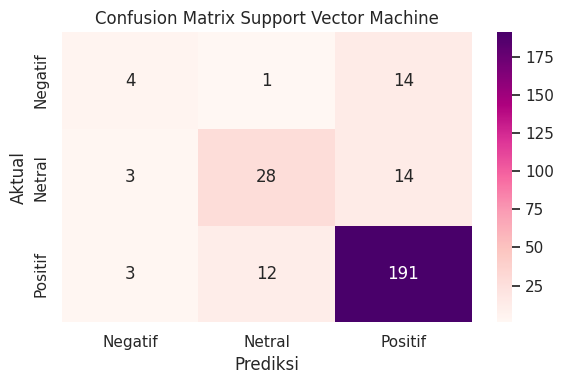

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# y_test (aktual) dan y_pred_balanced (prediksi)
cm = confusion_matrix(y_test_enc, y_pred_svm_fasttext)
labels = ['Negatif', 'Netral', 'Positif']

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='RdPu',
            xticklabels=labels, yticklabels=labels)

plt.title('Confusion Matrix Support Vector Machine')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.tight_layout()
plt.show()

# **8. K-NEAREST NEIGHBOR - FAST TEXT**

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train dan evaluasi KNN
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_resampled, y_train_resampled)
y_pred_knn_fasttext = knn_clf.predict(X_test_emb)

# Evaluasi (Prediksi)
print("Confusion Matrix:")
print(confusion_matrix(y_test_enc, y_pred_knn_fasttext))

print("\nClassification Report:")
print(classification_report(y_test_enc, y_pred_knn_fasttext, target_names=le.classes_))

print("\nAccuracy Score:")
print(accuracy_score(y_test_enc, y_pred_knn_fasttext))

Confusion Matrix:
[[  4   1  14]
 [  3  28  14]
 [  3  12 191]]

Classification Report:
              precision    recall  f1-score   support

     negatif       0.40      0.21      0.28        19
      netral       0.68      0.62      0.65        45
     positif       0.87      0.93      0.90       206

    accuracy                           0.83       270
   macro avg       0.65      0.59      0.61       270
weighted avg       0.81      0.83      0.81       270


Accuracy Score:
0.825925925925926


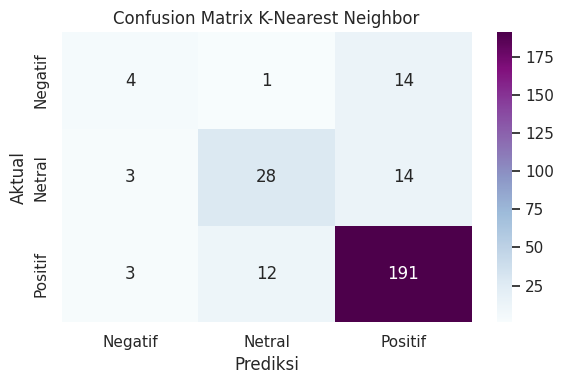

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# y_test (aktual) dan y_pred_balanced (prediksi)
cm = confusion_matrix(y_test_enc, y_pred_knn_fasttext)
labels = ['Negatif', 'Netral', 'Positif']

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu',
            xticklabels=labels, yticklabels=labels)

plt.title('Confusion Matrix K-Nearest Neighbor')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.tight_layout()
plt.show()

# **9. NAIVE BAYES CLASSIFIER - FAST TEXT**

In [72]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train dan evaluasi Naive Bayes (GaussianNB)
nb_clf = GaussianNB()
nb_clf.fit(X_train_resampled, y_train_resampled)
y_pred_nb_fasttext = nb_clf.predict(X_test_emb)

# Evaluasi (Prediksi)
print("Confusion Matrix:")
print(confusion_matrix(y_test_enc, y_pred_nb_fasttext))

print("\nClassification Report:")
print(classification_report(y_test_enc, y_pred_nb_fasttext, target_names=le.classes_))

print("\nAccuracy Score:")
print(accuracy_score(y_test_enc, y_pred_nb_fasttext))

Confusion Matrix:
[[ 11   1   7]
 [  4  28  13]
 [  8  12 186]]

Classification Report:
              precision    recall  f1-score   support

     negatif       0.48      0.58      0.52        19
      netral       0.68      0.62      0.65        45
     positif       0.90      0.90      0.90       206

    accuracy                           0.83       270
   macro avg       0.69      0.70      0.69       270
weighted avg       0.84      0.83      0.83       270


Accuracy Score:
0.8333333333333334


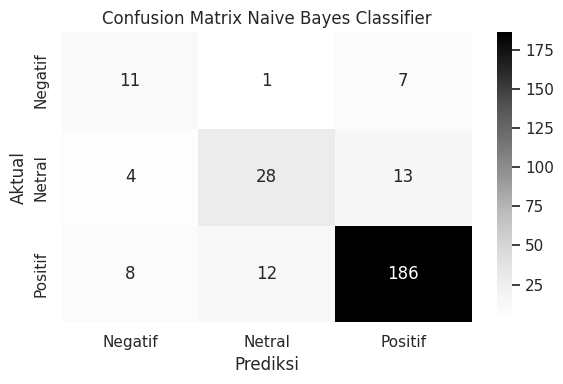

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# y_test (aktual) dan y_pred_balanced (prediksi)
cm = confusion_matrix(y_test_enc, y_pred_nb_fasttext)
labels = ['Negatif', 'Netral', 'Positif']

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greys',
            xticklabels=labels, yticklabels=labels)

plt.title('Confusion Matrix Naive Bayes Classifier')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.tight_layout()
plt.show()

# **10. VISUALISASI DATA - TABEL PERBANDINGAN**

In [74]:
from sklearn.metrics import classification_report

# Contoh hasil prediksi dan label asli
report_svm_tfidf = classification_report(y_test, y_pred_balanced, output_dict=True)
report_svm_fasttext = classification_report(y_test_enc, y_pred_svm_fasttext, output_dict=True)

report_knn_tfidf = classification_report(y_test, y_pred_knn, output_dict=True)
report_knn_fasttext = classification_report(y_test_enc, y_pred_knn_fasttext, output_dict=True)

report_nb_tfidf = classification_report(y_test, y_pred_nb, output_dict=True)
report_nb_fasttext = classification_report(y_test_enc, y_pred_nb_fasttext, output_dict=True)

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/tmp/ipython-input-3761605096.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


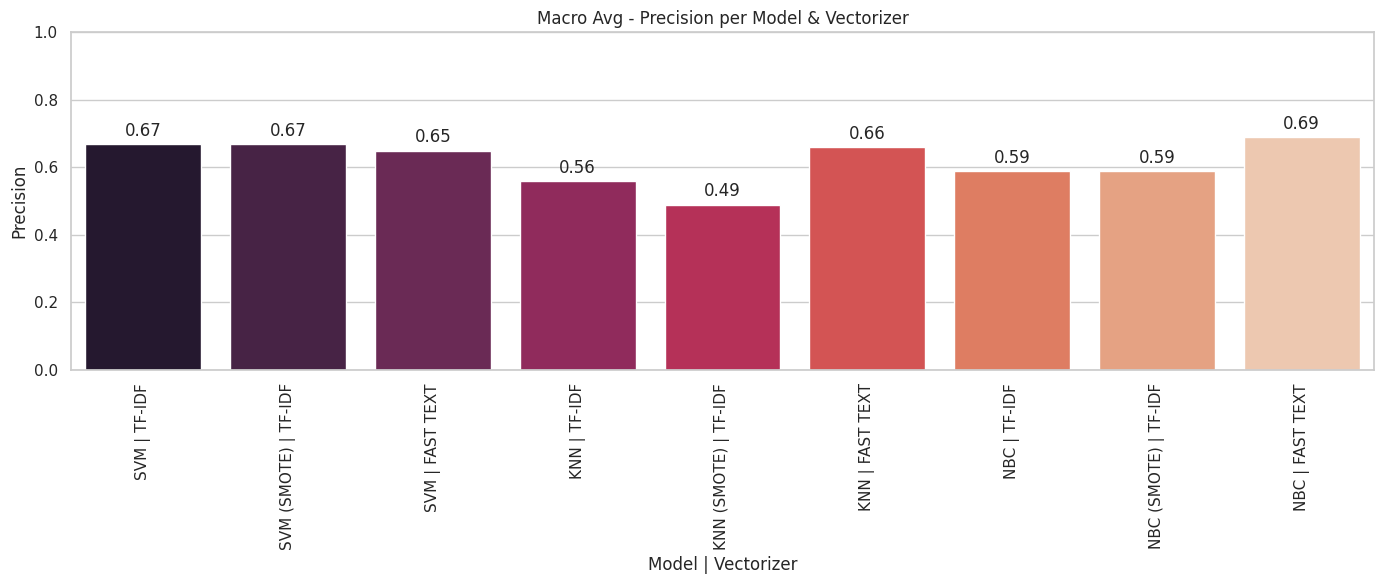

/tmp/ipython-input-3761605096.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


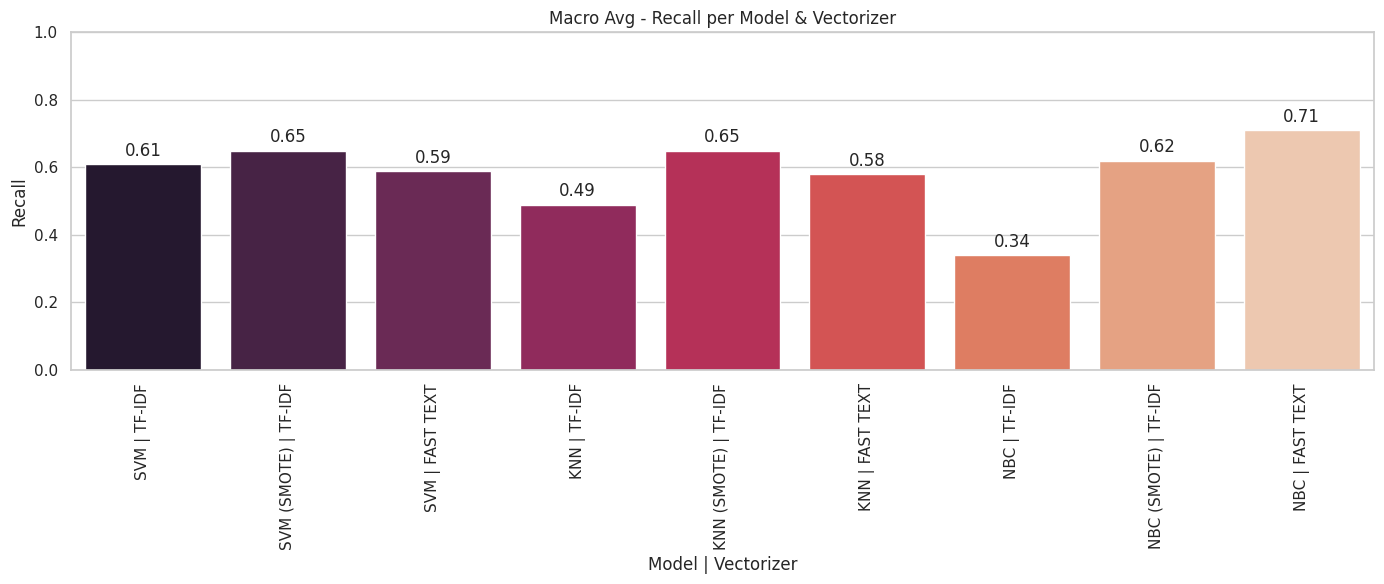

/tmp/ipython-input-3761605096.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


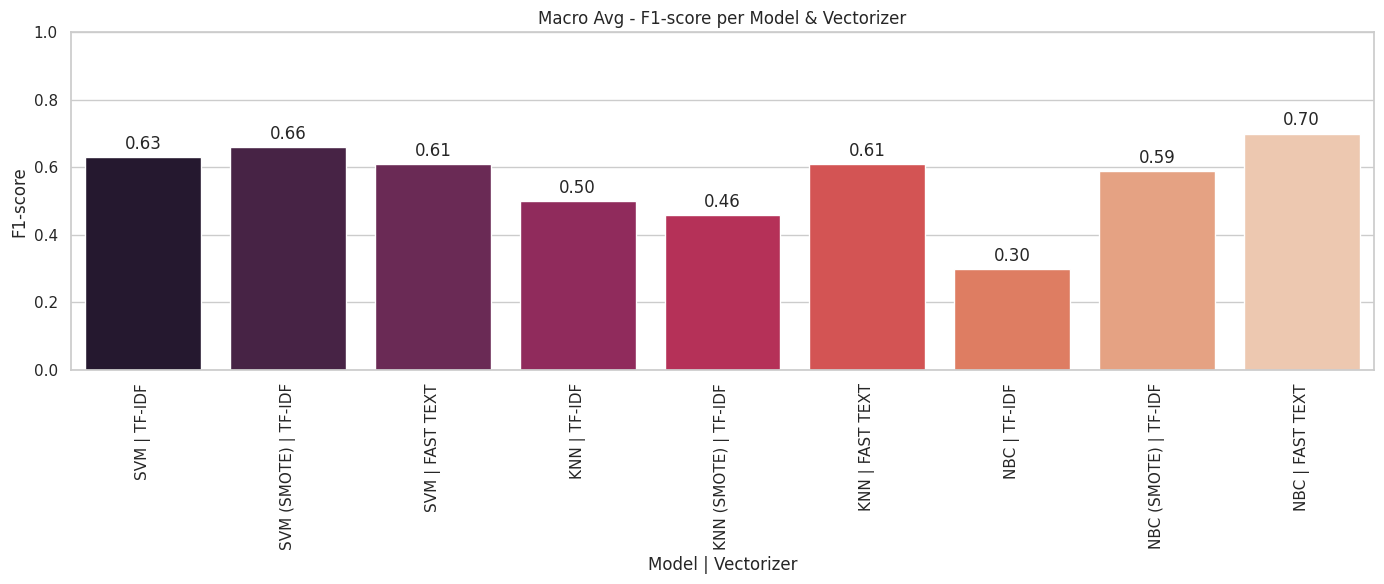

/tmp/ipython-input-3761605096.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


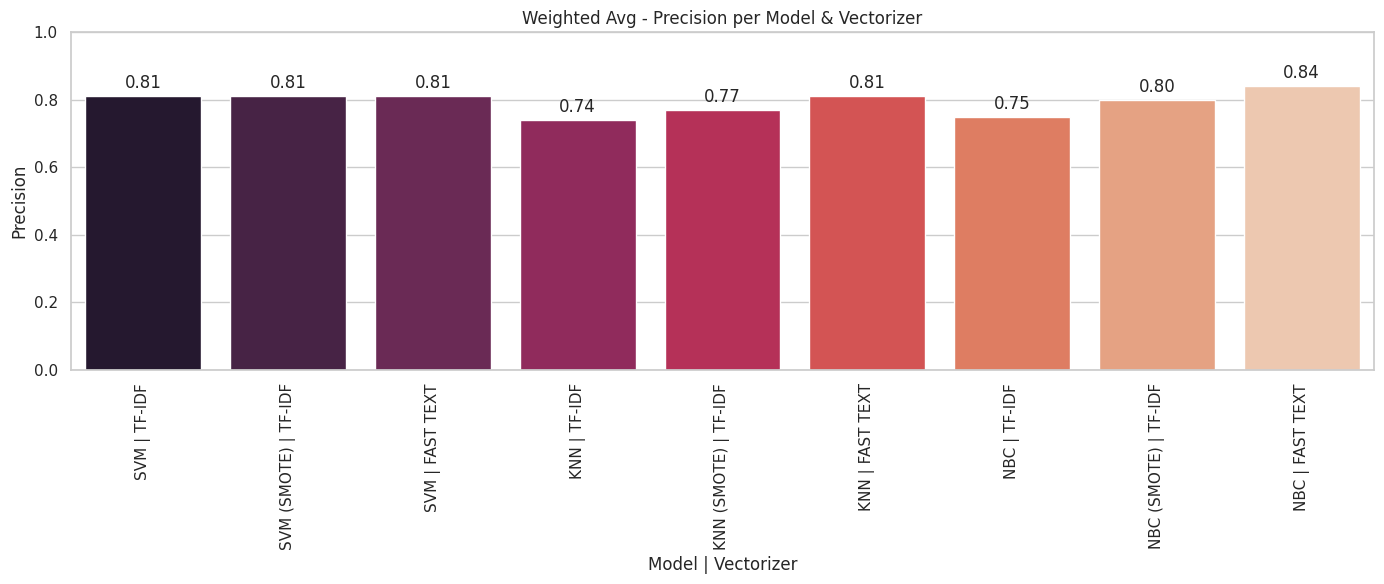

/tmp/ipython-input-3761605096.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


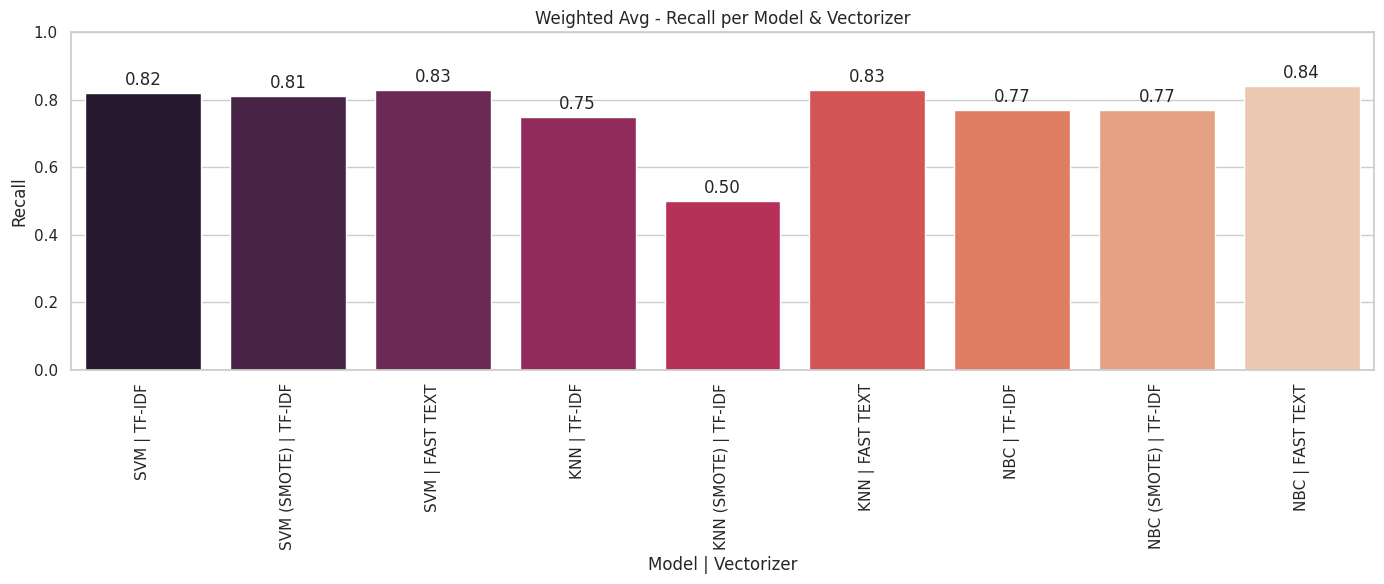

/tmp/ipython-input-3761605096.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


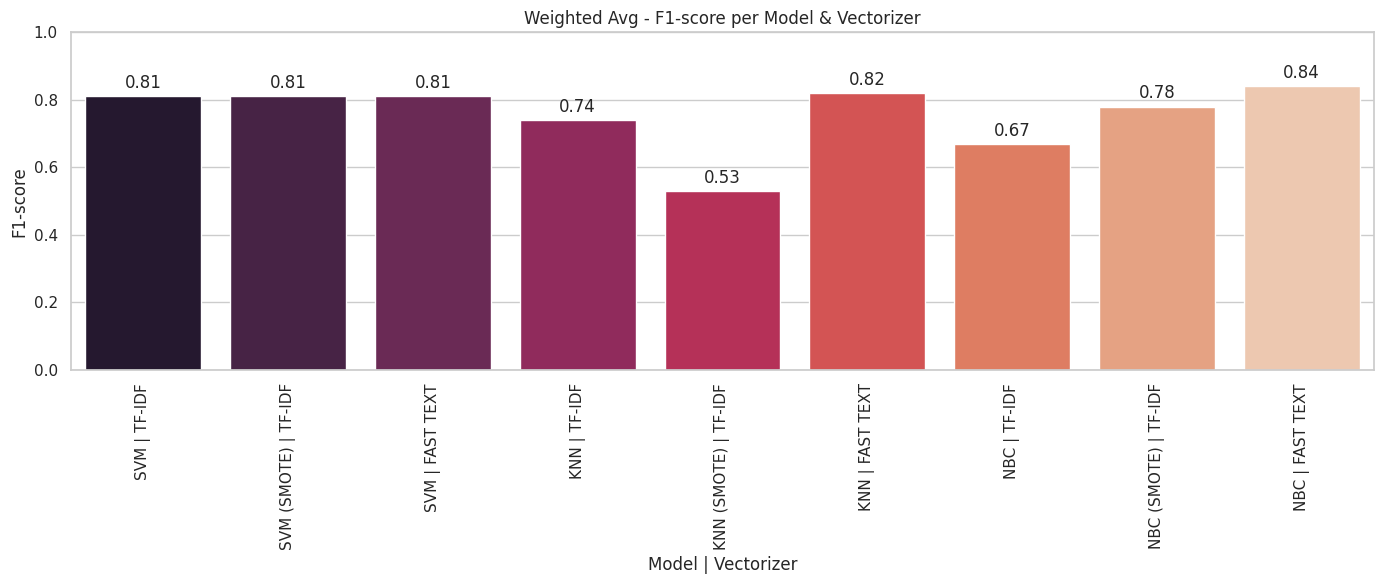

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Baca data dari CSV ===
# Ganti 'data.csv' dengan nama file kamu
df = pd.read_csv('/content/drive/MyDrive/portofolio_data_analyst/DataKlasifikasiNew1.csv')

df["Group"] = df["Model"] + " | " + df["Vectorizer"]

# === 3. Buat visualisasi terpisah berdasarkan Average Type ===
average_types = ["Macro Avg", "Weighted Avg"]
metrics = ["Precision", "Recall", "F1-score"]

sns.set(style="whitegrid")

for avg in average_types:
    for metric in metrics:
        plt.figure(figsize=(14, 6))
        subset = df[(df["Average"] == avg) & (df["Matrix"] == metric)]

        # === Buat barplot dan simpan dalam variabel ax ===
        ax = sns.barplot(
            data=subset,
            x="Group",
            y="Value",
            palette="rocket"
        )

        # === Tambahkan label angka di atas setiap batang ===
        for container in ax.containers:
            ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

        plt.title(f"{avg} - {metric} per Model & Vectorizer")
        plt.xlabel("Model | Vectorizer")
        plt.ylabel(metric)
        plt.xticks(rotation=90)
        plt.ylim(0, 1)  # Supaya label tidak terpotong
        plt.tight_layout()
        plt.show()

/tmp/ipython-input-3111407817.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


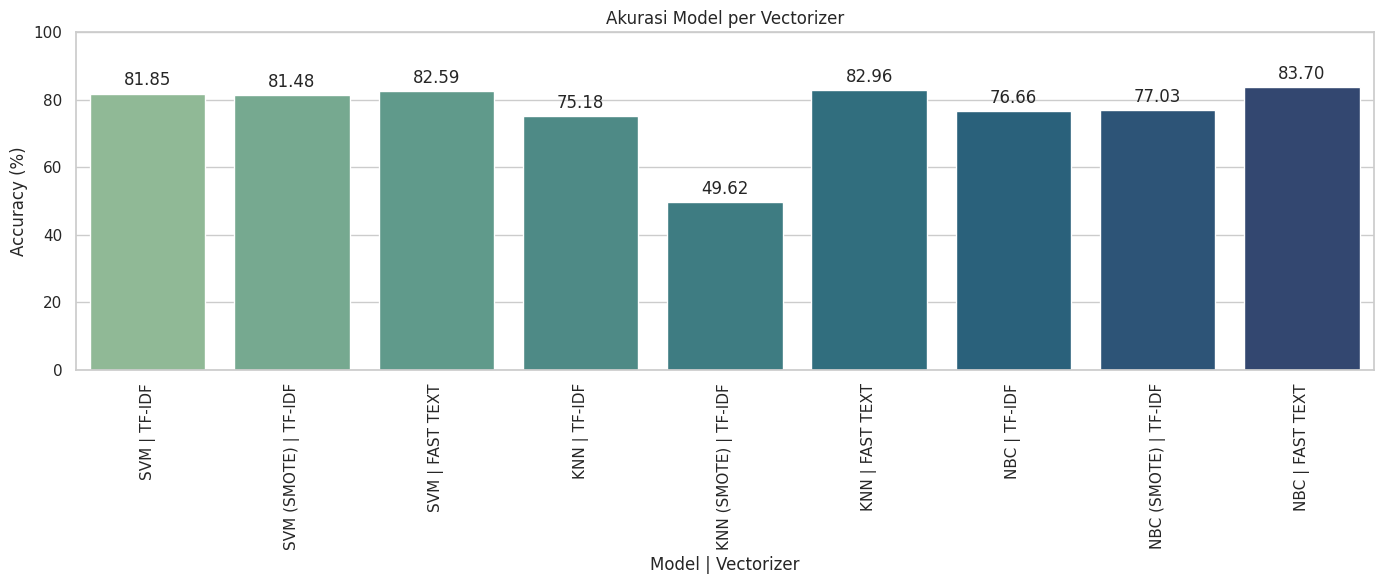

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Baca data dari sheet kedua file Excel ===
file_path = '/content/drive/MyDrive/Dataset/DataKlasifikasiNew.xlsx'
df_acc = pd.read_excel(file_path, sheet_name=1)

# === 2. Tambahkan kolom untuk label X-axis ===
df_acc["Group"] = df_acc["Model"] + " | " + df_acc["Vectorizer"]

# === 3. Visualisasikan Accuracy ===
plt.figure(figsize=(14, 6))
sns.set(style="whitegrid")

ax = sns.barplot(
    data=df_acc,
    x="Group",
    y="Value",
    palette="crest"
)

# Tampilkan nilai akurasi di atas bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

plt.title("Akurasi Model per Vectorizer")
plt.xlabel("Model | Vectorizer")
plt.ylabel("Accuracy (%)")
plt.xticks(rotation=90)
plt.ylim(0, 100)  # Karena akurasi dalam persen
plt.tight_layout()
plt.show()